In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time, sys
from IPython.display import clear_output, display
from time import sleep
import random
from tabulate import tabulate

In [2]:
%run -i ./Classes.ipynb

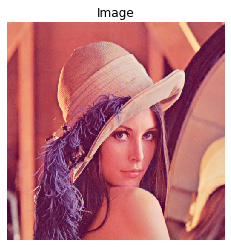

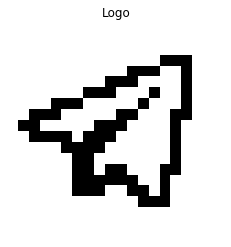

In [3]:
# Load
ori_img = cv2.imread('./assets/lena.png') #BGR
ori_logo = cv2.imread('./assets/paperplane.png', 0)

image_size = 512
logo_size = 20

# Initialize
my_image = Image(ori_img, image_size)
my_logo = Logo(ori_logo, logo_size)

ImageUtil.show1(my_image.image, 'Image', 4)
ImageUtil.show1(my_logo.logo, 'Logo', 4)

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

PSNR = 31.974713385863843


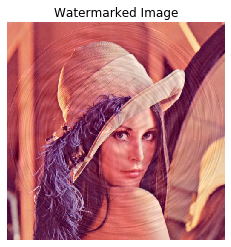

In [4]:
# Watermarker
riw = RIW(image_size, logo_size, logo_size * 2, 0.5, 20)

# Embed
img_y_watermarked = riw.embed(my_image.get_y(), my_logo.logo)

w_image = Image.copy(my_image)
w_image.set_y(img_y_watermarked)

print('PSNR = {}'.format(ImageUtil.psnr(my_image.image, w_image.image)))

ImageUtil.show1(w_image.image, 'Watermarked Image')

'Transform PCET: [####################] 100.0%'

BER = 0.00%


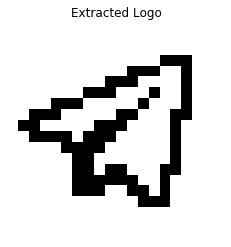

In [5]:
logo_extracted = riw.extract(w_image.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_extracted)))

ImageUtil.show1(logo_extracted, 'Extracted Logo')

In [6]:
riw256 = RIW(256, logo_size, logo_size * 2, 0.5, 20)

'Transform PCET: [####################] 100.0%'

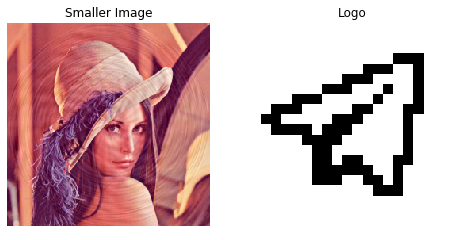

In [7]:
zo_image = Image(Attacker.attackResize(w_image.image, 256), 256)
zo_image_logo = riw256.extract(zo_image.get_y())

ImageUtil.show([[zo_image.image, zo_image_logo]], [['Smaller Image', 'Logo']])

'Transform PCET: [####################] 100.0%'

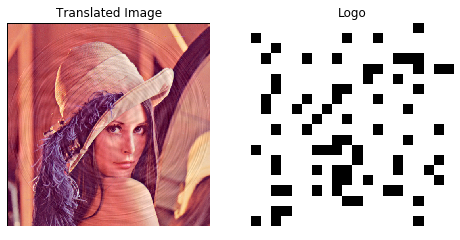

In [8]:
tr_image = Image(Attacker.attackTranslateByPixel(w_image.image, 2, 2), 512)
tr_image_logo = riw.extract(tr_image.get_y())

ImageUtil.show([[tr_image.image, tr_image_logo]], [['Translated Image', 'Logo']])


'Transform PCET: [####################] 100.0%'

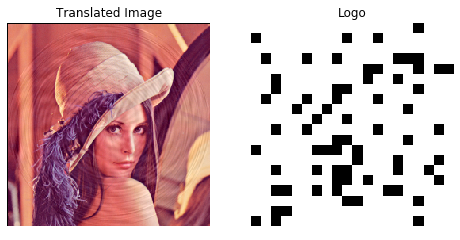

In [9]:
zo_tr_image = Image(Attacker.attackTranslateByPixel(zo_image.image, 1, 1), 256)
zo_tr_image_logo = riw256.extract(zo_tr_image.get_y())

ImageUtil.show([[zo_tr_image.image, zo_tr_image_logo]], [['Translated Image', 'Logo']])


# Translation Type 0

In [11]:
test_translation_0_xy = []
for tr in [-0.12, -0.09, -0.06, -0.03, 0, 0.03, 0.06, 0.09, 0.12]:
    trx = int(image_size * tr)
    tr_image = Image(Attacker.attackTranslateByPixel(w_image.image, trx, trx), image_size)
    
    tr_logo = riw.extract(tr_image.get_y())
    
    ber = ImageUtil.ber(my_logo.logo, tr_logo)
    
    test_translation_0_xy.append((tr, ber, trx, 0, 0, 1))
    
print(tabulate(test_translation_0_xy, headers=['Translation (%)', 'BER', 'TRX', 'CX', 'CY', 'CS']))

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

  Translation (%)     BER    TRX    CX    CY    CS
-----------------  ------  -----  ----  ----  ----
            -0.12  0.3       -61     0     0     1
            -0.09  0.2975    -46     0     0     1
            -0.06  0.3325    -30     0     0     1
            -0.03  0.33      -15     0     0     1
             0     0           0     0     0     1
             0.03  0.2925     15     0     0     1
             0.06  0.3325     30     0     0     1
             0.09  0.315      46     0     0     1
             0.12  0.31       61     0     0     1


# Translation Type I

In [30]:
test_translation_1_xy = []
for tr in [-0.12, -0.09, -0.06, -0.03, 0, 0.03, 0.06, 0.09, 0.12]:
    trx = int(image_size * tr)
    tr_image = Image(Attacker.attackTranslateByPixel(w_image.image, trx, trx), image_size)
    
    (cx, cy, cs) = AntiTranslation.calculate_center(w_image.image, tr_image.image)
    c_image = Image(Attacker.attackTranslateByPixel(tr_image.image, cx, cy), image_size)
    
    c_logo = riw.extract(c_image.get_y())
    
    ber = ImageUtil.ber(my_logo.logo, c_logo)
    
    test_translation_1_xy.append((tr, ber, trx, cx, cy, cs))
    
print(tabulate(test_translation_1_xy, headers=['Translation (%)', 'BER', 'TRX', 'CX', 'CY', 'CS']))

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

  Translation (%)     BER    TRX    CX    CY    CS
-----------------  ------  -----  ----  ----  ----
            -0.12  0.085     -30    30    30     1
            -0.09  0.1075    -23    23    23     1
            -0.06  0.0525    -15    15    15     1
            -0.03  0.0225     -7     7     7     1
             0     0           0     0     0     1
             0.03  0.0375      7    -7    -7     1
             0.06  0.0775     15   -15   -15     1
             0.09  0.115      23   -23   -23     1
             0.12  0.1175     30   -30   -30     1



# Translation Type II

In [31]:
def attackTranslateWithFrame(image, dx, dy):
    (h, w, c) = image.shape
    
    frame = np.zeros((h + np.abs(dy), w + np.abs(dx), c)).astype('uint8')
    start_x = np.max([0, dx])
    start_y = np.max([0, dy])
    frame[start_y:start_y+h, start_x:start_x+w, :] = image
    return frame

In [32]:
def image_trim(image, image_size, cx, cy, cs):
    (h, w, c) = image.shape
    new_size = int(h * cs)
    if(new_size % 2 == 1):
        new_size = new_size + 1
    new_image = Attacker.attackResize(image, new_size)
    new_image = Attacker.attackTranslateByPixel(new_image, cx, cy)
    
    half_size = int(image_size / 2)
    center = int(new_size / 2)
    
    return new_image[center-half_size:center+half_size, center-half_size:center+half_size, :]

In [33]:
test_translation_2_xy = []
for tr in [-0.12, -0.09, -0.06, -0.03, 0, 0.03, 0.06, 0.09, 0.12]:
    trx = int(tr * image_size)
    if(trx % 2 == 1):
        trx = trx + 1
    tr_image = Image(attackTranslateWithFrame(w_image.image, trx, trx), image_size + np.abs(trx))
    
    (cx, cy, cs) = AntiTranslation.calculate_center(w_image.image, tr_image.image)
    c_image = Image(image_trim(tr_image.image, image_size, cx, cy, cs), image_size)
    
    c_logo = riw.extract(c_image.get_y())
    
    ber = ImageUtil.ber(my_logo.logo, c_logo)
    
    test_translation_2_xy.append((tr, ber, trx, cx, cy, cs))
    
print(tabulate(test_translation_2_xy, headers=['Translation (%)', 'BER', 'TRX', 'CX', 'CY', 'CS']))

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Calculate Center: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

  Translation (%)    BER    TRX    CX    CY    CS
-----------------  -----  -----  ----  ----  ----
            -0.12      0    -30    15    15     1
            -0.09      0    -22    11    11     1
            -0.06      0    -14     7     7     1
            -0.03      0     -6     3     3     1
             0         0      0     0     0     1
             0.03      0      8    -4    -4     1
             0.06      0     16    -8    -8     1
             0.09      0     24   -12   -12     1
             0.12      0     30   -15   -15     1
